In [12]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog

def load_file_as_dataframe():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])  # Show the file dialog
    if file_path:
        df = pd.read_csv(file_path)
        return df
    else:
        print("Aucun fichier sélectionné.")
        return None

# Usage
dataframe = load_file_as_dataframe()
if dataframe is not None:
    print(dataframe.head())


2023-09-05 14:16:53.326 python[48500:895286] +[CATransaction synchronize] called within transaction
2023-09-05 14:16:53.342 python[48500:895286] +[CATransaction synchronize] called within transaction
2023-09-05 14:16:59.046 python[48500:895286] +[CATransaction synchronize] called within transaction


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


'path_to_your_file.csv'

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import filedialog

def process_and_train_knn_decision_tree(dataframe):
    # Load the dataset
    #file_path = input("Veuillez entrer le chemin du fichier CSV : ")
    data = load_file_as_dataframe()




    # Preprocess the data
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Cabin_Known'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

    le = LabelEncoder()
    data['Sex'] = le.fit_transform(data['Sex'])

    # Prepare features and target variable
    X = data[['Sex', 'Age', 'SibSp', 'Cabin_Known']]
    y = data['Survived']

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize variables to store KNN results
    k_values = range(1, 21)
    accuracies = []

    # Loop over various k values for KNN
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred_knn = knn.predict(X_test_scaled)
        accuracy_knn = accuracy_score(y_test, y_pred_knn)
        accuracies.append(accuracy_knn)

    # Plot the KNN results
    plt.figure(figsize=(30, 10))
    plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. K Value for KNN')
    plt.xticks(k_values)
    plt.grid(True)

    plt.show()

    best_k = k_values[accuracies.index(max(accuracies))]
    print(f"The best K value is {best_k} with an accuracy of {max(accuracies)}")

    # Train Decision Tree and plot it
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_scaled, y_train)
    y_pred_dt = dt.predict(X_test_scaled)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)

    plt.figure(figsize=(20, 20))
    plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], rounded=True)
    plt.title('Decision Tree')
    plt.show()

    print(f"The accuracy of the Decision Tree model is {accuracy_dt}")




2023-09-05 14:32:21.927 python[48500:895286] +[CATransaction synchronize] called within transaction
2023-09-05 14:32:21.956 python[48500:895286] +[CATransaction synchronize] called within transaction
2023-09-05 14:32:28.378 python[48500:895286] +[CATransaction synchronize] called within transaction
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtos

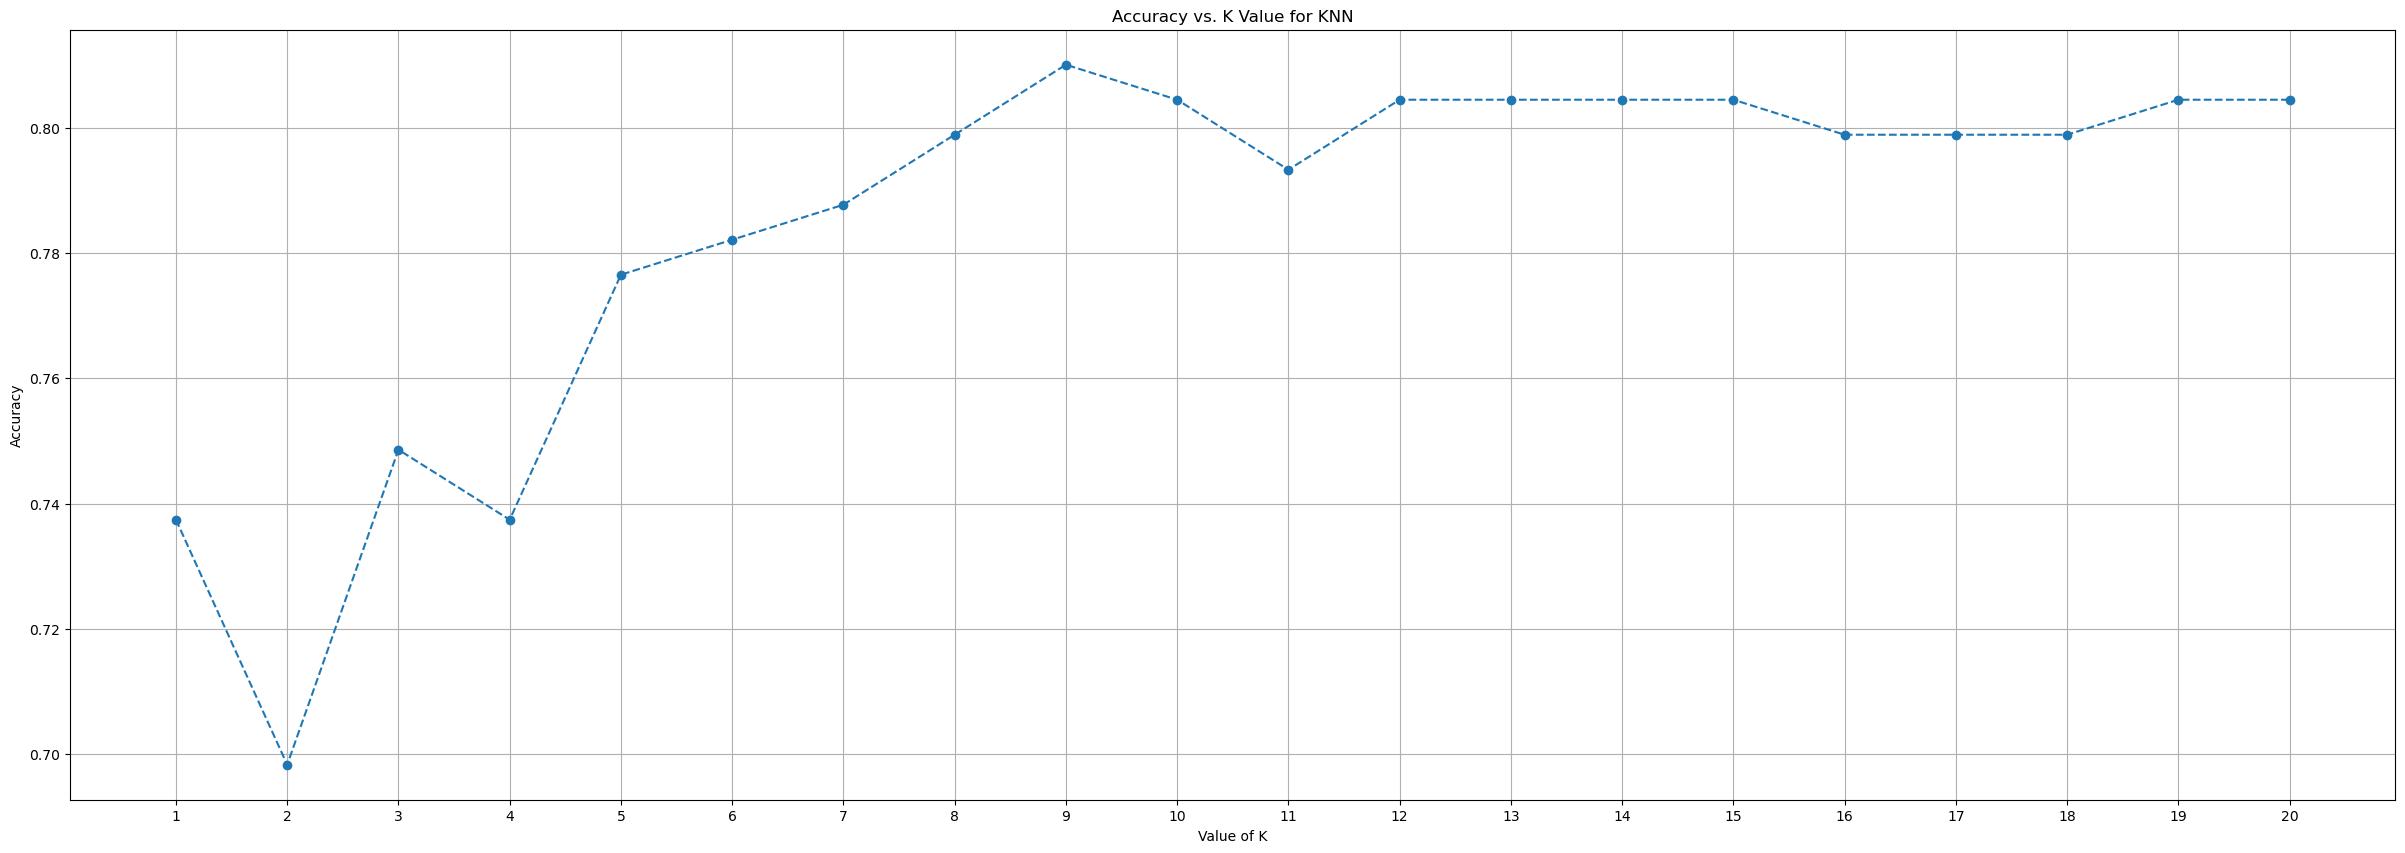

The best K value is 9 with an accuracy of 0.8100558659217877


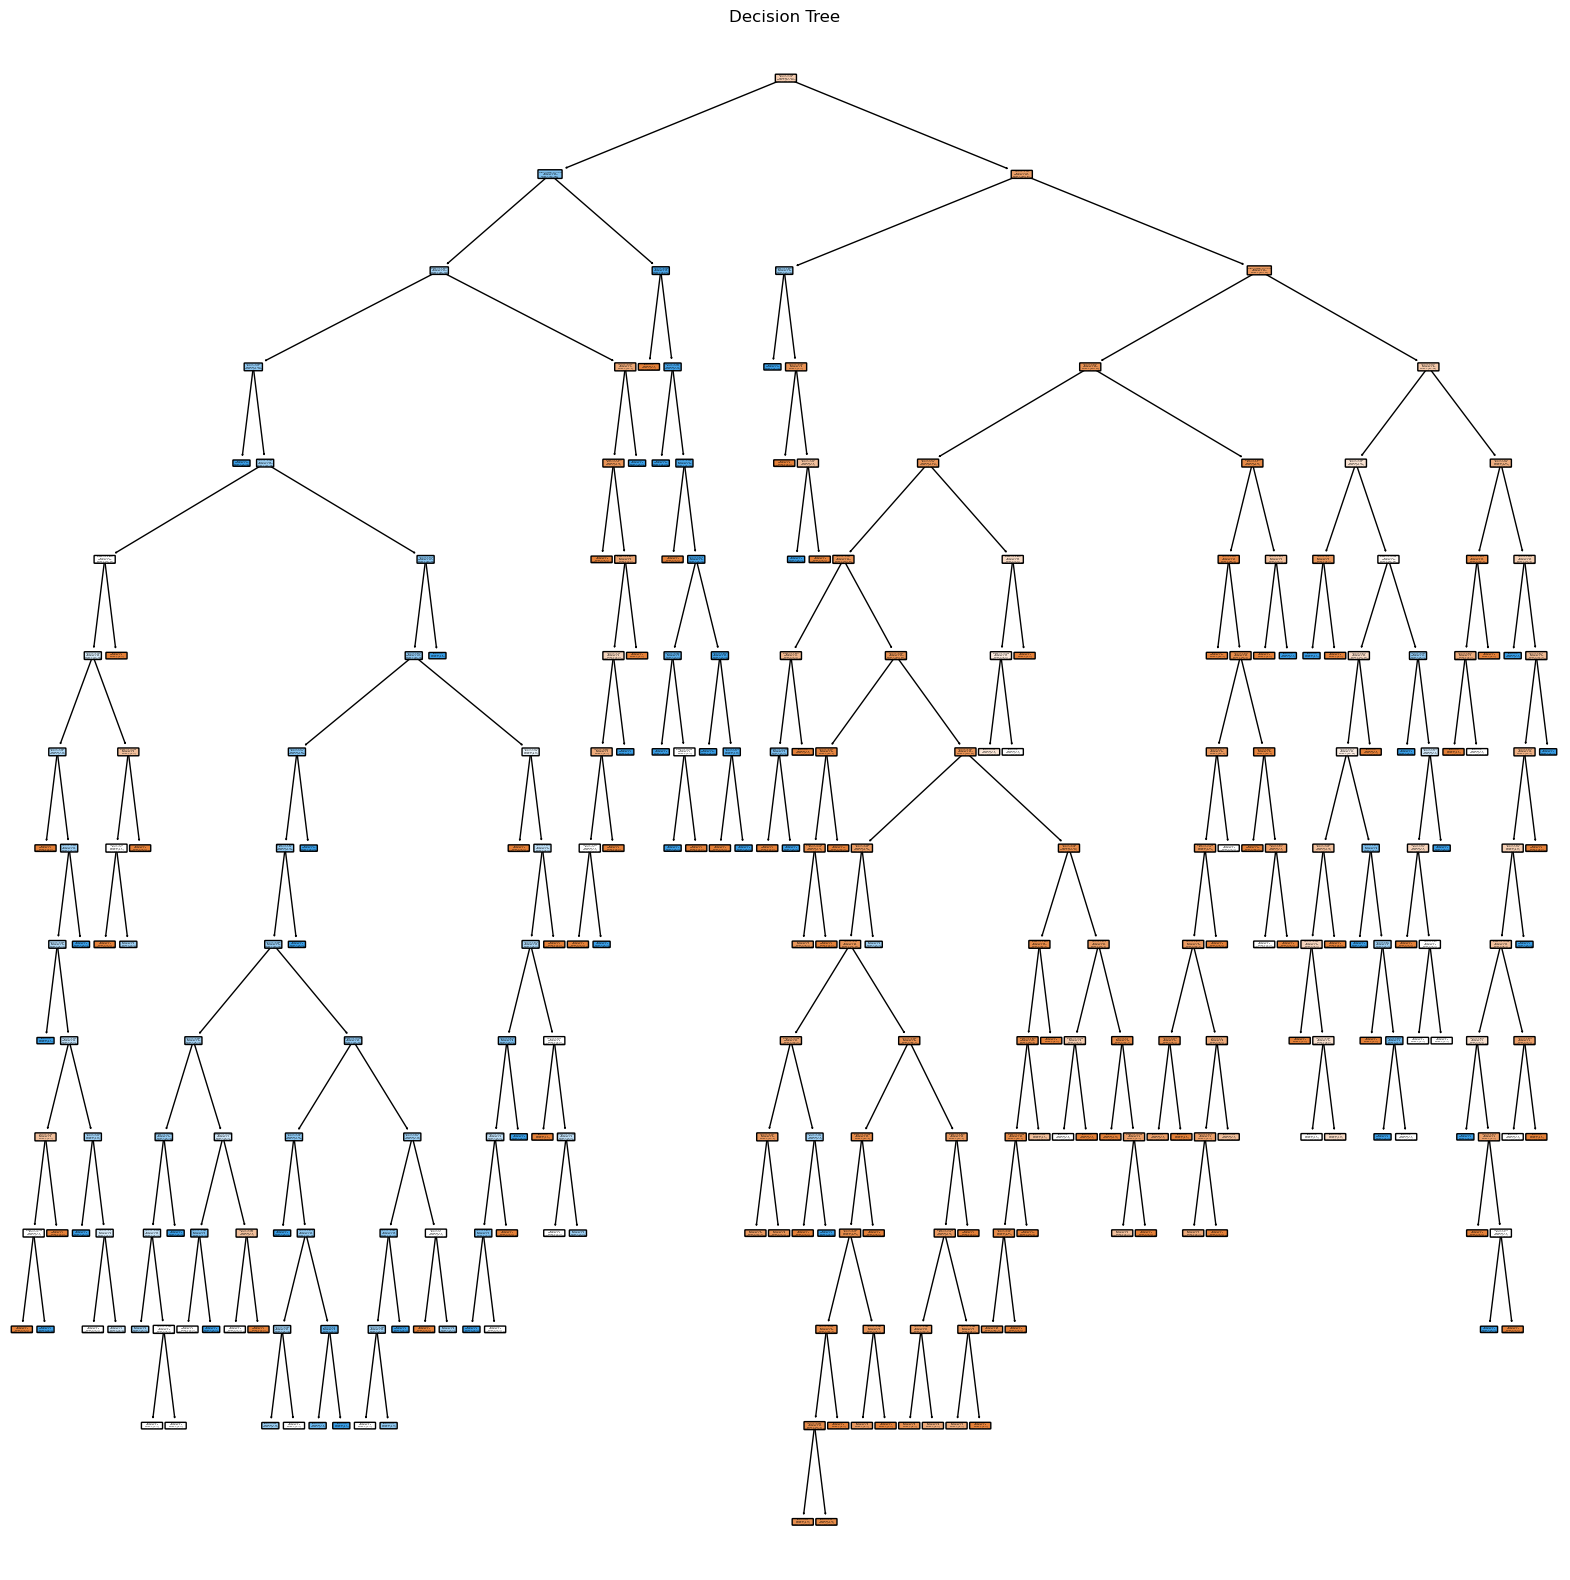

The accuracy of the Decision Tree model is 0.7988826815642458


In [19]:
# Usage example
file_path = "path_to_your_file.csv"  # Replace with the path to your dataset
process_and_train_knn_decision_tree(file_path)
